## Import the necessary libraries

In [ ]:
from qiskit import QuantumCircuit, execute, Aer, QuantumRegister, ClassicalRegister

## We create a quantum circuit with 3 qubits and 2 bits

In [2]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qreg_q, creg_c)

## Codification

In [3]:
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)

## We assume that a Z type error occurs in the second qubit

In [4]:
qc.z(1)

## Detection of errors

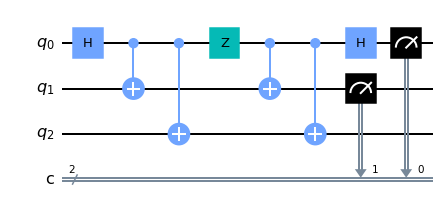

In [5]:
qc.cx(0, 1)
qc.cx(0, 2)
qc.h(0)
qc.measure([0, 1], creg_c)
qc.draw(output="mpl")

## Correction of errors

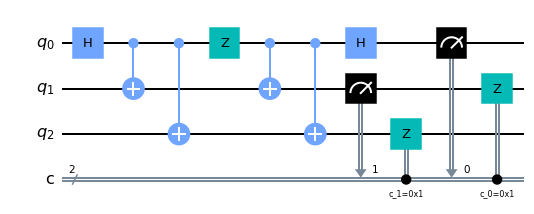

In [6]:
qc.z(1).c_if(creg_c[0], 1)
qc.z(2).c_if(creg_c[1], 1)
qc.draw(output="mpl")

## Decodification

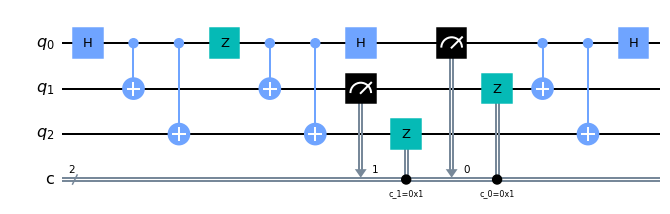

In [7]:
qc.cx(0, 1)
qc.cx(0, 2)
qc.h(0)
qc.draw(output="mpl")

## Creation of a simulation

In [8]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

{'01': 1000}


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
